# gridded_data_tutorial
## Notebook 2: xarray
Waterhackweek 2020
Steven Pestana (spestana@uw.edu)
***

By the end of this notebook you will be able to:
* Create DataArrays and Datasets
* ...
* ...

---

### xarray

The [xarray](https://xarray.pydata.org/) library allows us to read, manipulate, and create **labeled** multi-dimensional arrays and datasets, such as NetCDF files.

In the image below, we can imagine having two "data cubes" (3-dimensional data arrays) of temperature and precipitation values, each of which corresponds to a particular x and y spatial coordinate, and t time step.

<img src="https://xarray.pydata.org/en/stable/_images/dataset-diagram.png" width=700>

In [22]:
import xarray as xr

---
# DataArrays
Similar to the `numpy.ndarray` object, the `xarray.DataArray` is a multi-dimensional array, with the addition of labeled dimensions, coordinates, and other metadata. A [DataArray](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.html) contains the following: 
* `values` which store the actual data values in a `numpy.ndarray`
* `dims` are the names for each dimension of the `values` array
* `coords` are arrays of labels for each point
* `attrs` is a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) that can contain additional metadata

Let's create some fake streamflow data for two locations to see how these different parts work together to form a DataArray. I'm going to use a NumPy function to generate some random numbers that are [normally distributed](https://numpy.org/devdocs/reference/random/generated/numpy.random.normal.html).

In [23]:
import numpy as np
import pandas as pd

In [126]:
# randomly generated annual peak streamflow data for two locations

# give each stream a different mean and standard deviation peak streamflow (cfs)
means = [1000, 900]
standard_deviations = [75, 30] 

# specify that we want to generate 100 random samples for 2 locations
samples = (100, 2)

# generate the random samples
# the .T at the end of the command transforms the numpy array from shape (100, 2) into (2, 100)
peak_streamflow = np.random.normal(means, standard_deviations, samples)

In [127]:
#peak_streamflow

`peak_flows` will be the `values` within the DataArray. It is a two-dimensional array, and we've given it a shape of 100x3. The two dimensions will need names (`dims`) and labels (`coords`):

In [128]:
# Make a sequence of 100 years to be our time dimension
years = pd.date_range('1920', periods=100, freq ='1Y')

In [129]:
# Make the labels for our two locations
locations = ['east_watershed', 'west_watershed']

In [133]:
# We can call our two dimensions time, and location corresponding to the dimensions with lengths 100 (years) and 2 (locations) respectively
dimensions = ['time', 'watershed']

Finally we can create a metadata dictionary which will be included in the DataArray

In [134]:
metadata = {'units': 'cfs'}

Now that we have all the individual components of an xarray DataArray, we can create it

In [146]:
streamflow = xr.DataArray( peak_streamflow, coords=[years, locations], dims=dimensions,  name='peak_streamflow', attrs=metadata)

Inspect the DataArray we just created

In [147]:
streamflow

<xarray.DataArray 'peak_streamflow' (time: 100, watershed: 2)>
array([[1061.16363967,  921.16052008],
       [ 949.93458329,  901.77850678],
       [1032.00103933,  934.65328747],
       [ 944.04059945,  884.48508376],
       [ 965.23731379,  876.31498501],
       [1059.72951998,  929.22855779],
       [ 923.19014156,  909.45359241],
       [1125.54331677,  901.42265047],
       [ 862.28028997,  881.60700536],
       [1026.18004654,  888.52290875],
       [1255.77993054,  906.77360329],
       [1020.41930365,  891.9438032 ],
       [ 915.19168314,  913.72525746],
       [1018.22552324,  844.9899118 ],
       [ 906.66517212,  883.28578957],
       [1001.52097946,  902.58065862],
       [1016.98587059,  934.25786992],
       [ 930.58985429,  901.34589304],
       [ 974.92947124,  854.35687428],
       [1108.55506788,  872.10072139],
       [ 875.66814885,  900.48993887],
       [ 969.59515844,  916.87608056],
       [1148.95921583,  888.80451335],
       [ 994.17566999,  940.35897965],
       [1034.20691687,  910.18170167],
       [ 864.17555767,  892.7415145 ],
       [1089.99578641,  922.09749034],
       [ 961.16590708,  946.23901482],
       [1110.23704294,  936.64012526],
       [ 864.44616211,  903.52596187],
       [1075.7582275 ,  915.45148278],
       [1053.6636796 ,  839.90933233],
       [ 933.89151547,  864.28297452],
       [ 904.93558776,  876.12979236],
       [1032.7715027 ,  922.92724216],
       [1058.92971091,  891.39137494],
       [1060.6074286 ,  899.35773575],
       [1049.75573515,  911.15383231],
       [ 887.74422826,  870.84550768],
       [ 889.2996088 ,  939.48592529],
       [1008.18868042,  893.24246567],
       [1086.22664085,  950.0348487 ],
       [1103.19710356,  850.78156442],
       [1010.1377756 ,  894.45278026],
       [1076.06496548,  940.77983847],
       [1074.68094695,  861.33402495],
       [1041.77004076,  944.17335345],
       [ 897.45288704,  940.32555794],
       [1005.46603855,  910.96288929],
       [1022.85589325,  932.02948232],
       [1092.52523052,  941.1340455 ],
       [1078.06132014,  910.78591392],
       [1045.70255814,  871.25268973],
       [1031.68700473,  933.69371772],
       [1071.71897864,  887.23956209],
       [ 857.57224623,  866.96432022],
       [ 991.31630402,  913.85130803],
       [ 951.88512997,  921.36786878],
       [1001.92250459,  849.83206075],
       [ 976.92795495,  895.33289012],
       [1088.17848876,  919.44244351],
       [ 977.2410248 ,  892.94826826],
       [ 925.70860246,  896.7068002 ],
       [ 969.82977335,  911.20997963],
       [ 924.91429236,  863.29187633],
       [ 928.29765346,  919.53738241],
       [ 927.50125778,  884.51185341],
       [1059.35591447,  899.98191526],
       [1071.2332892 ,  911.99850895],
       [ 938.24422572,  928.56189132],
       [ 941.59108863,  833.78488265],
       [ 978.95375119,  881.50585951],
       [1060.71375267,  935.05867288],
       [ 974.03718043,  888.44826997],
       [ 928.53408336,  930.10356601],
       [ 892.85888332,  923.05234626],
       [ 989.68427559,  891.14467996],
       [ 932.5939732 ,  885.70416944],
       [ 923.79089243,  879.49716283],
       [ 968.18146657,  878.49060119],
       [ 881.59949621,  942.37163546],
       [1025.22850531,  887.49764416],
       [1041.4233423 ,  874.69008009],
       [ 917.24125901,  899.49242877],
       [ 911.35783901,  902.2286061 ],
       [1078.04511664,  934.11112084],
       [1147.19087777,  873.72942412],
       [ 985.31157791,  891.70577715],
       [1071.40813167,  893.13502661],
       [1024.6877096 ,  892.64635803],
       [ 969.05896598,  892.27785975],
       [ 880.46169023,  945.93064464],
       [1029.83675478,  891.3086503 ],
       [1085.72323386,  917.30425973],
       [1038.91120224,  908.45053659],
       [ 855.3852074 ,  916.79053773],
       [ 999.68374251,  869.35323182],
       [1019.64692511,  929.26623121],
       [ 912.49362942,  939.45246792],
       [1049.06268906,  884.10295399]])
Coordinates:
  * time       (time) d

In [148]:
# Get the DataArray dimensions (labels for coordinates)
streamflow.dims

('time', 'watershed')

In [149]:
# Get the DataArray coordinates
streamflow.coords

Coordinates:
  * time       (time) datetime64[ns] 1920-12-31 1921-12-31 ... 2019-12-31
  * watershed  (watershed) <U14 'east_watershed' 'west_watershed'

In [150]:
# Look at our attributes
streamflow.attrs

{'units': 'cfs'}

In [151]:
# Take a look at the data values
streamflow.values

array([[1061.16363967,  921.16052008],
       [ 949.93458329,  901.77850678],
       [1032.00103933,  934.65328747],
       [ 944.04059945,  884.48508376],
       [ 965.23731379,  876.31498501],
       [1059.72951998,  929.22855779],
       [ 923.19014156,  909.45359241],
       [1125.54331677,  901.42265047],
       [ 862.28028997,  881.60700536],
       [1026.18004654,  888.52290875],
       [1255.77993054,  906.77360329],
       [1020.41930365,  891.9438032 ],
       [ 915.19168314,  913.72525746],
       [1018.22552324,  844.9899118 ],
       [ 906.66517212,  883.28578957],
       [1001.52097946,  902.58065862],
       [1016.98587059,  934.25786992],
       [ 930.58985429,  901.34589304],
       [ 974.92947124,  854.35687428],
       [1108.55506788,  872.10072139],
       [ 875.66814885,  900.48993887],
       [ 969.59515844,  916.87608056],
       [1148.95921583,  888.80451335],
       [ 994.17566999,  940.35897965],
       [1034.20691687,  910.18170167],
       [ 864.17555767,  8

## DataArray indexing

DataArrays can be [indexed or sliced](https://xarray.pydata.org/en/stable/indexing.html) much like ndarrays, but  with the addition of using labels.

| Dimension lookup | Index lookup | DataArray syntax |
| ---              | ---          | ---              |
| positional       | by integer   | `da[:,0]`        |
| positional       | by label     | `da.loc[:,'east_watershed']` |
| by name          | by integer   | `da.isel(watershed=0)` |
| by name          | by label     | `da.sel(watershed='east_watershed')` |

Let's select by name and by label, streamflow for just one watershed, and plot it. (Conveniently, x-array will add axes labels and a title by default.)

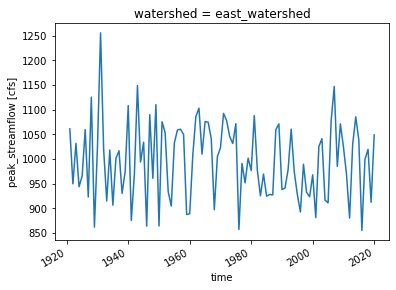

In [152]:
streamflow.sel(watershed='east_watershed').plot()

Now let's select a shorter time range to plot data from both watersheds.

In [157]:
streamflow.sel(time=slice('1980','2020')).

AttributeError: 'DataArray' object has no attribute 'east_watershed'

KeyError: 'north_watershed'

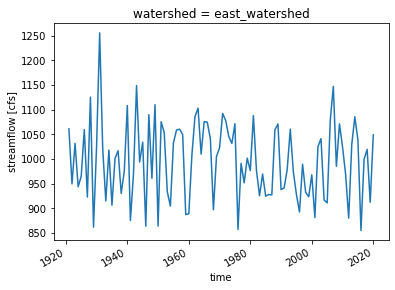

In [141]:
# picking the 0th location (positional, by integer)
streamflow[:,0].plot()

# using .loc() and the name of the location (positional, by label)
streamflow.loc[:,'east_watershed'].plot()

# (by name, by integer)
streamflow.isel(watershed=0).plot()

# (by name, by label)
streamflow.sel(watershed='east_watershed').plot()

---
# Datasets

Similar to the `pandas.dataframe`, the `xarray.Dataset` contains one or more labeled `xarray.DataArray` objects.

We can create a [Dataset](https://xarray.pydata.org/en/stable/data-structures.html#dataset) with our simulated data here. First, create another DataArray with annual cumulative precipitation

In [94]:
# randomly generated annual cumulative precipitation data for three locations

# give each location a different mean and standard deviation precipitation value (inches)
means = [15, 6]
standard_deviations = [3, 6] 

# specify that we want to generate 100 random samples for 2 locations
samples = (100, 2)

# generate the random samples
# the .T at the end of the command transforms the numpy array from shape (100, 2) into (2, 100)
cumulative_precip = np.random.normal(means, standard_deviations, samples).T

In [35]:
precip = xr.DataArray( cumulative_precip, coords=[times, locations], dims=dimensions, name='precip', attrs={'units':'inches'})

Now merge our two DataArrays and create a Dataset.

In [39]:
my_data = xr.merge([streamflow, precip])

In [40]:
my_data

<xarray.Dataset>
Dimensions:     (location: 3, time: 100)
Coordinates:
  * time        (time) datetime64[ns] 1920-12-31 1921-12-31 ... 2019-12-31
  * location    (location) <U15 'north_watershed' ... 'south_watershed'
Data variables:
    streamflow  (time, location) float64 1.021e+03 1.394e+03 ... 1.391e+03 878.8
    precip      (time, location) float64 20.72 20.43 -5.678 ... 15.65 -0.8064

# Indexing/slicing methods

DataArrays and Datasets can be indexed or sliced much like ndarrays, but also with the addition of using labels.

https://xarray.pydata.org/en/stable/indexing.html


| Dimension lookup | Index lookup | DataArray syntax | Dataset syntax |
| ---              | ---          | ---              | ---            |
| positional       | by integer   | `da[:,0]`        | *n/a* |
| positional       | by label     | `da.loc[:,'stream_gage_1']` | *n/a* |
| by name          | by integer   | `da.isel(location=0)` | `ds.isel(location=0)` |
| by name          | by label     | `da.sel(location='stream_gage_1')` | `ds.sel(location='stream_gage_1')` |

Select and plot the time series of streamflow for one location:

In [18]:
# picking the 0th location (positional, by integer)
my_data.streamflow[:,0].plot()

# using .loc() and the name of the location (positional, by label)
#my_data.streamflow.loc[:,'north_watershed'].plot()

# (by name, by integer)
# my_data.streamflow.isel(location=0)

# (by name, by label)
# my_data.sel(location='north_watershed')

NameError: name 'my_data' is not defined

---

Plot the fake data we just made

In [46]:
import matplotlib.pyplot as plt

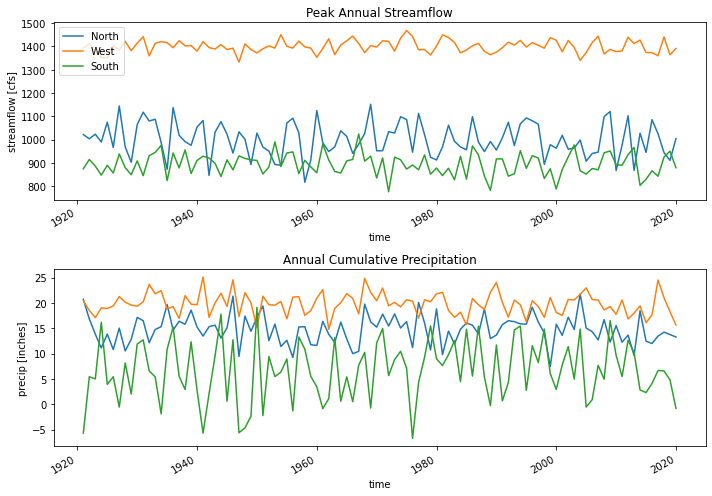

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7), tight_layout=True)


# Plot stream flow at each of the three sites

my_data.sel(location="north_watershed").streamflow.plot(ax=ax[0], label='North')
my_data.sel(location="west_watershed").streamflow.plot(ax=ax[0], label='West')
my_data.sel(location="south_watershed").streamflow.plot(ax=ax[0], label='South')

ax[0].legend(loc='upper left')
ax[0].set_title('Peak Annual Streamflow');



# Plot precipitation at each of the three sites

my_data.sel(location="north_watershed").precip.plot(ax=ax[1])
my_data.sel(location="west_watershed").precip.plot(ax=ax[1])
my_data.sel(location="south_watershed").precip.plot(ax=ax[1])

ax[1].set_title('Annual Cumulative Precipitation');

plt.savefig('my_data_plot.jpg')

To netcdf

In [48]:
my_data.to_netcdf('my_data.nc')

To pandas dataframe

In [49]:
my_data.to_dataframe()

streamflow     precip
location        time                              
north_watershed 1920-12-31  1021.477265  20.720801
                1921-12-31  1003.237317  16.840801
                1922-12-31  1023.194449  13.856114
                1923-12-31   989.553840  11.126030
                1924-12-31  1074.604923  13.854522
...                                 ...        ...
south_watershed 2015-12-31   865.872188   4.118992
                2016-12-31   842.537154   6.670017
                2017-12-31   924.736666   6.610388
                2018-12-31   949.979968   4.816446
                2019-12-31   878.833319  -0.806378

[300 rows x 2 columns]

To csv via a pandas dataframe

In [50]:
my_data.to_dataframe().to_csv('test.csv')